In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import gc

sns.set()
%matplotlib inline

import sys
# np.set_printoptions(suppress=True)
# np.set_printoptions(threshold=sys.maxsize)
# np.set_printoptions(precision=3)

# DISPLAY_MAX_ROWS = 20 #20
# pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)
# pd.set_option('display.max_column',None) 
plt.style.use('seaborn-whitegrid')


# plt.rcParams["figure.figsize"] = (20, 15)

import warnings
warnings.filterwarnings('ignore')

## ДЗ №1

Используя данные таблицы 'math_students.csv', ответьте на следующие вопросы:

In [26]:
url = 'https://raw.githubusercontent.com/new-okaerinasai/math-ml-hse-2019/master/sem01_intro/math_students.csv'
data = pd.read_csv(url, on_bad_lines='skip', delimiter=',')
# data.head()

1. Какая причина выбора школы была самой частой? В качестве ответа приведите соответствующее значение признака.

In [27]:
popular_reason = data['reason'].value_counts().idxmax() # разбиваем по уникальным сериям и находим индекс максимального счётчика
print("Самая частая причина выбора школы -", popular_reason)

Самая частая причина выбора школы - course


2. Найдите количество студентов, у родителей которых нет никакого образования.

In [28]:
print("Количество студентов с родителями без образования -", len(data[(data['Fedu'] < 1) & (data['Medu'] < 1)]))

Количество студентов с родителями без образования - 0


3. Найдите минимальный возраст учащегося школы Mousinho da Silveira.

In [31]:
min_age = data[data['school'] == 'MS'].min()['age']
print("минимальный возраст учащегося школы Mousinho da Silveira -", min_age)

минимальный возраст учащегося школы Mousinho da Silveira - 17


4. Найдите количество студентов, имеющих нечетное число пропусков.

In [ ]:
dodged_classes = len(data[data['absences'] % 2 != 0])
print("Количество студентов с нечетным числом пропусков -", dodged_classes)

5. Найдите разность между средними итоговыми оценками студентов, состоящих и не состоящих в романтических отношениях. В качестве ответа приведите число, округленное до двух значащих цифр после запятой.

In [36]:
mean_grade_dated = data[data['romantic'] == 'yes']['G3'].mean()
mean_grade_not_dated = data[data['romantic'] == 'no']['G3'].mean()

print("Разность между средними итоговыми оценками парочек и одиноких волков/волчиц =",
       round(mean_grade_dated - mean_grade_not_dated, 2))

# парочки похуже по средней успеваемости

Разность между средними итоговыми оценками парочек и одиноких волков/волчиц = -1.26


6. Сколько занятий пропустило большинство студентов с самым частым значением наличия внеклассных активностей?

*Примечание. В данном контексте под "большинством" подразумеваются студенты, имеющее самое частое значение пропусков. То есть в данном задании необходимо:*


* *Определить самое частое значение наличия внеклассных активностей (да или нет).*
* *Для группы студентов, соответствующей этому значению, рассмотреть значения признака «число пропусков».*
* *Для каждого значения числа пропусков посчитать, сколько студентов ему соответствует.*
* *Выбрать значение числа пропусков с наибольшим числом студентов.*

In [64]:
active_students = data[data['activities'] == 'yes']
series = active_students['absences'].value_counts()
recent_valueOf_absences = series.where(series.index > 0).idxmax()
print("большиство студентов, у которых есть внеклассная деятельность, прогуляло " 
      + str(recent_valueOf_absences) + " раза" )

большиство студентов, у которых есть внеклассная деятельность, прогуляло 2 раза


## ДЗ №2. Анализ данных пассажиров "Титаника"

https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv

Загрузить данные, провести предварительный анализ и ответить на вопросы, которые указаны ниже.

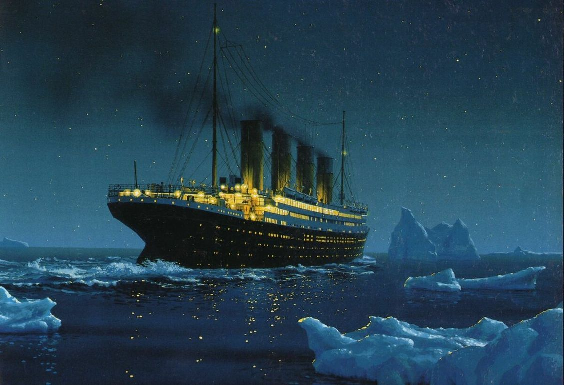

Значение столбцов таблицы:

* PassengerId — идентификатор пассажира
* Survival — поле в котором указано спасся человек (1) или нет (0)
* Pclass — содержит социально-экономический статус:
    - высокий
    - средний
    - низкий
* Name — имя пассажира
* Sex — пол пассажира
* Age — возраст
* SibSp — содержит информацию о количестве родственников 2-го порядка (муж, жена, братья, сетры)
* Parch — содержит информацию о количестве родственников на борту 1-го порядка (мать, отец, дети)
* Ticket — номер билета
* Fare — цена билета
* Cabin — каюта
* Embarked — порт посадки
    - C — Cherbourg
    - Q — Queenstown
    - S — Southampton

Ответьте на следующие вопросы:

In [3]:
url = 'https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv'
data = pd.read_csv(url, on_bad_lines='skip', delimiter=',')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. Сколько мужчин / женщин находилось на борту?

In [4]:
passanngers_amount = data['Sex'].value_counts()
print(passanngers_amount['male'], 'мужчин')
print(passanngers_amount['female'], 'женщин')

577 мужчин
314 женщин


2. Выведите распределение переменной Pclass (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужщин 2-го класса?

In [29]:
pclass = data['Pclass'].value_counts()
pclass_x = data[data['Sex'] == 'female']['Pclass'].value_counts()
pclass_y = data[data['Sex'] == 'male']['Pclass'].value_counts()

print("\nдля всех:", pclass, sep='\n')
print("\nдля женщин:", pclass_x, sep='\n')
print("\nдля мужчин:", pclass_y, sep='\n')

print("мужчин 2-ого класса:", pclass_y[2])



для всех:
3    491
1    216
2    184
Name: Pclass, dtype: int64

для женщин:
3    144
1     94
2     76
Name: Pclass, dtype: int64

для мужчин:
3    347
1    122
2    108
Name: Pclass, dtype: int64
мужчин 2-ого класса: 108


3. Каковы медиана и стандартное отклонение платежей (Fare)? Округлите до 2 десятичных знаков.

In [32]:
median = data['Fare'].median()
deviation = data['Fare'].std()

print("медиана:", round(median, 2))
print("стантартное отклонение:", round(deviation, 2))

медиана: 14.45
стантартное отклонение: 49.69


4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?

In [61]:
young = data[data['Age'] < 30]
old = data[data['Age'] > 60]

young_survived = young[young['Survived'] == 1]['Survived']
old_survived = old[old['Survived'] == 1]['Survived']

young_percentage = young_survived.count()/young['Survived'].count()
old_percentage = old_survived.count()/old['Survived'].count()

print("правда ли, что молодые выживали чаще?", young_percentage > old_percentage)
print("доля выживших среди молодых -", young_percentage) 
print("доля выживших среди старых -", old_percentage)
# ну или просто среднее достать можно было


правда ли, что молодые выживали чаще? True
доля выживших среди молодых - 0.40625
доля выживших среди старых - 0.22727272727272727


5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?

In [67]:
women_percentage = data[data['Sex'] == 'female']['Survived'].mean()
men_percentage = data[data['Sex'] == 'male']['Survived'].mean()

print("правда ли, что женщины выживали чаще?", women_percentage > men_percentage)
print("доля выживших среди женщин -", women_percentage) 
print("доля выживших среди мужчин -", men_percentage)


правда ли, что женщины выживали чаще? True
доля выживших среди женщин - 0.7420382165605095
доля выживших среди мужчин - 0.18890814558058924


6. Найдите самое популярное имя среди пассажиров Титаника мужского пола

In [102]:
men = data[data['Sex'] == 'male']
first_names = men["Name"].str.split(", ").str[1].str.split().str[1]
print(first_names.value_counts().idxmax(), "- самое популярное имя среди мужчин")

William - самое популярное имя среди мужчин


7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?

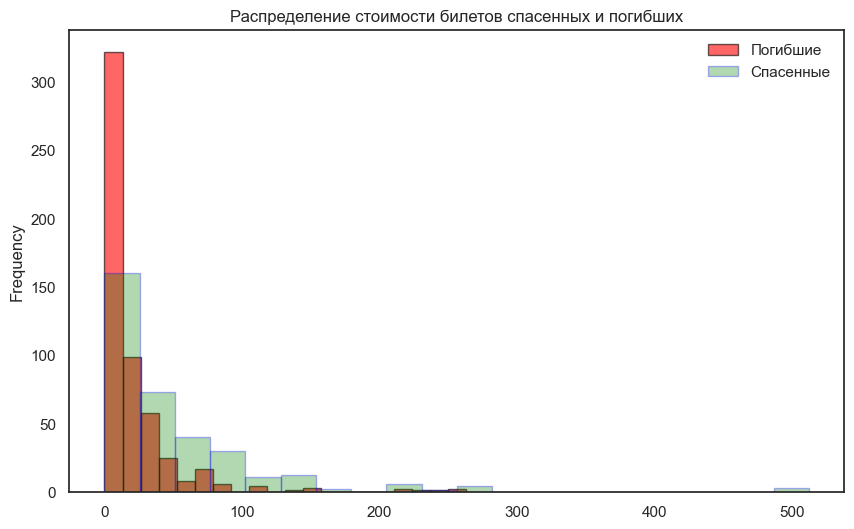

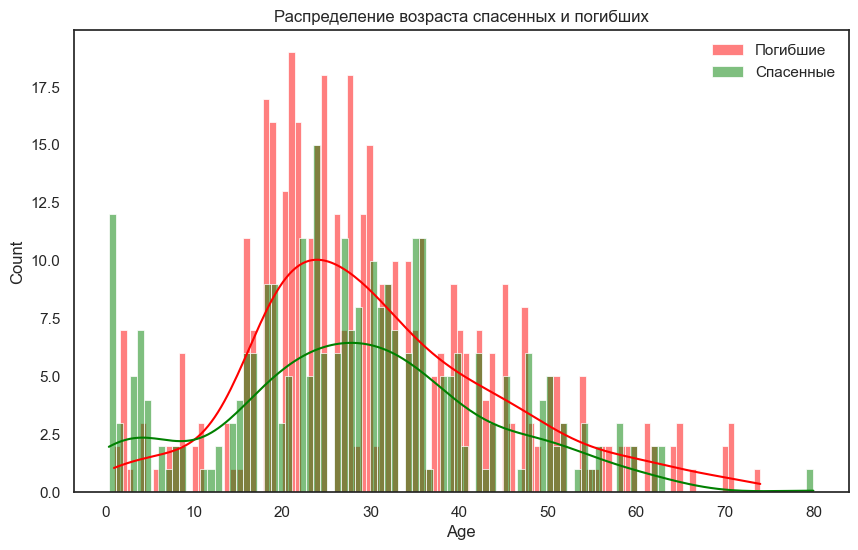

In [66]:
rip = data[data['Survived'] == 0]
survived = data[data['Survived'] == 1]

plt.figure(figsize=(10, 6))
sns.set(style="white")

rip['Fare'].plot.hist(alpha=0.6, color="red", bins=20, label="Погибшие", edgecolor='black')
survived['Fare'].plot.hist(alpha=0.3, color="green", bins=20, label="Спасенные", edgecolor='blue')
plt.legend()
plt.title("Распределение стоимости билетов спасенных и погибших")
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(rip['Age'], alpha=0.5, color="red", bins=100, kde=True, label="Погибшие")
sns.histplot(survived['Age'], alpha=0.5, color="green", bins=100, kde=True, label="Спасенные")
plt.legend()
plt.title("Распределение возраста спасенных и погибших")

plt.show()

Средний возраст погибщих выше

8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания?

    - В среднем мужчины 1-го класса старше 40 лет - true
    - В среднем женщины 1-го класса старше 40 лет - false
    - Мужчины всех классов в среднем старше женщин того же класса - true
    - В среднем люди в 1-ом классе старше, чем во 2-ом, а те старше представителей 3-го класса - true

In [75]:
mean_age_male_class1 = data[(data['Sex'] == 'male') & (data['Pclass'] == 1)]['Age'].mean()
mean_age_female_class1 = data[(data['Sex'] == 'female') & (data['Pclass'] == 1)]['Age'].mean()
print("Средний возраст мужчин 1 класса -", round(mean_age_male_class1))
print("Средний возраст женщин 1 класса -", round(mean_age_female_class1))

Средний возраст мужчин 1-го класса: 41
Средний возраст женщин 1-го класса: 35


In [76]:
mean_age_male_by_class = data[data['Sex'] == 'male'].groupby('Pclass')['Age'].mean()
mean_age_female_by_class = data[data['Sex'] == 'female'].groupby('Pclass')['Age'].mean()

print("Средний возраст мужчин по всем классам")
print(mean_age_male_by_class, '\n')

print("Средний возраст женщин по всем классам")
print(mean_age_female_by_class)

Средний возраст мужчин по всем классам
Pclass
1    41.281386
2    30.740707
3    26.507589
Name: Age, dtype: float64 

Средний возраст женщин по всем классам
Pclass
1    34.611765
2    28.722973
3    21.750000
Name: Age, dtype: float64


In [77]:
mean_age_by_class = data.groupby('Pclass')['Age'].mean()
print("Средний возраст по всем классам")
print(mean_age_by_class)

Средний возраст по всем классам
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


### Ссылки на дополнительные источники информации:

https://nagornyy.me/it/osnovy-analiza-dannykh-v-pandas/

https://habr.com/ru/company/ruvds/blog/494720/

https://github.com/hse-ds/iad-intro-ds/blob/master/2022/seminars/sem02_pandas.ipynb

https://blog.skillfactory.ru/kak-nachat-analizirovat-dannye-v-pandas-pervye-shagi/